## IMPORT LIBRARY

In [1]:
import tensorflow as tf
import numpy
import seaborn as sns
from keras.layers import Flatten,Dense
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

## VISUALISASI DATASET

classes: A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y
A : 305
B : 343
C : 345
D : 348
E : 295
F : 343
G : 347
H : 320
I : 340
K : 325
L : 306
M : 344
N : 332
O : 337
P : 308
Q : 320
R : 337
S : 339
T : 336
U : 316
V : 336
W : 335
X : 330
Y : 328


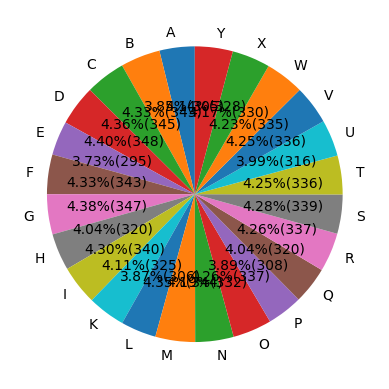

In [2]:
class_names=os.listdir("Train")
print(f"classes: {','.join(class_names)}")
folders = os.listdir('Train')
list=[]
for folder in folders:
    print(f"{folder} : {len(os.listdir(f'Train/{folder}'))}")
    list.append(len(os.listdir(f'Train/{folder}')))
plt.pie(list, labels=class_names, startangle=90,autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*sum(list)))
plt.show()

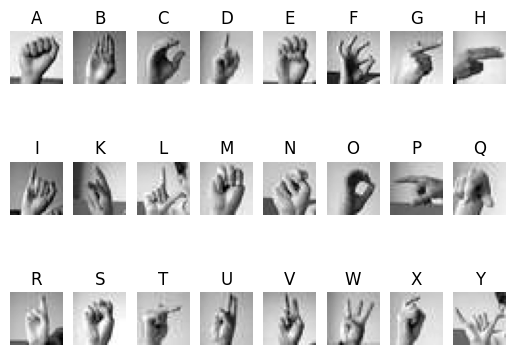

In [3]:
for i,folder in enumerate(folders):
    plt.subplot(3, 8, i + 1)
    plt.title(folder)
    plt.axis('off')
    if ((os.listdir('Train//'+folder)[0])=='.ipynb_checkpoints'):
        plt.imshow(plt.imread(f"Train//{folder}//{os.listdir('Train//'+folder)[2]}"),cmap="gray")
        pass
    else:
        plt.imshow(plt.imread(f"Train//{folder}//{os.listdir('Train//'+folder)[0]}"),cmap="gray")
plt.show()

### AUGMENTASI <a name="AUGMENTASI">

In [4]:
def custom_augmentation(np_tensor):
    def gaussian_noise(np_tensor):
        mean = 0
        var = numpy.random.randint(1, 26)
        noise = numpy.random.normal(mean,var**0.5,np_tensor.shape)
        return numpy.clip(np_tensor + noise, 0, 255).astype('float')
    augmnted_tensor = gaussian_noise(np_tensor)
    return numpy.array(augmnted_tensor)
img_datagen=ImageDataGenerator(
            preprocessing_function=custom_augmentation,
            rescale = 1.0/255.,
            rotation_range=20,horizontal_flip=False,
            validation_split=0.3,fill_mode='nearest')

### PREPROCESSING <a name="PREPROCESSING">

In [5]:
test = tf.keras.preprocessing.image_dataset_from_directory(
    "Test/",image_size=(128,128),interpolation="nearest", batch_size=24,label_mode='categorical',seed=2,color_mode="grayscale")

Found 3707 files belonging to 24 classes.


In [6]:
train =img_datagen.flow_from_directory(
    'Train',target_size=(128,128),
    batch_size=60,
    shuffle=True,
    class_mode="categorical",
    color_mode="grayscale",
    subset='training')
validation =img_datagen.flow_from_directory(
    'Train',target_size=(128,128),
    batch_size=60,
    shuffle=True,
    class_mode="categorical",
    color_mode="grayscale",
    subset='validation')

Found 5551 images belonging to 24 classes.
Found 2364 images belonging to 24 classes.


## VISUALISASI DATA TRAIN

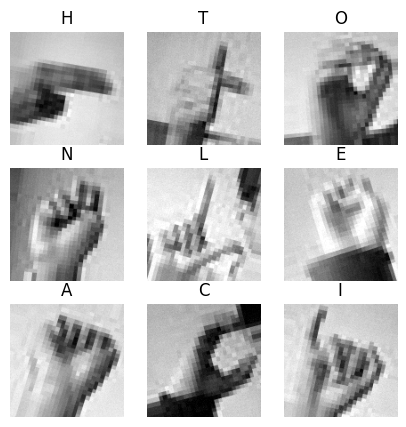

In [7]:
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img,label=train.next()
    plt.imshow(img[0],cmap="gray")
    plt.title(class_names[tf.argmax(label[0])])
    plt.axis('off')
plt.show()